In [42]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot

device = 'cuda' if torch.cuda.is_available() else 'cpu'
n_cudas = torch.cuda.device_count()
for i in range(n_cudas):
    print(torch.cuda.device_name(i))

true_b = 1
true_w = 2
N = 100

np.random.seed(42)
x = np.random.rand(N,1)
epsilon = (.1 * np.random.randn(N,1))
y = true_b + true_w * x + epsilon

idx = np.arange(N)
np.random.shuffle(idx)

train_idx = idx[:int(N*.8)]
val_idx = idx[int(N*.8):]

x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]
x_train_tensor = torch.as_tensor(x_train).to(device)
y_train_tensor = torch.as_tensor(y_train).to(device)


# def viz_features(x, y, min_x, max_x, min_y, max_y, color='ro'):
#     plt.plot(x, y, color)
#     plt.axis((min_x, max_x, min_y, max_y))
#     plt.show()

# viz_features(x_train, y_train, 0, x_train.max(), 0, y_train.max()), viz_features(x_val, y_val, 0, x_val.max(), 0, y_val.max(), 'bo')

In [43]:
torch.manual_seed(42)
b = torch.randn(1, requires_grad=True,dtype=torch.float,  device=device)
w = torch.randn(1,  requires_grad=True,dtype=torch.float, device=device)

print("true b,w:", true_b, true_w)
print("random b,w: ", b, w)

true b,w: 1 2
random b,w:  tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)


In [44]:
# Hyper parameters
optimizer = optim.SGD([b, w], lr=lr)
loss_fn = nn.MSELoss(reduction='mean')

n_epochs = 1000

for epoch in range(n_epochs):
    yhat = b + w * x_train_tensor
    
    loss = loss_fn(yhat, y_train_tensor)
    
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

print("final b,w:", b, w)

# Sanity check
linr = LinearRegression()
linr.fit(x_train, y_train)
print(linr.intercept_, linr.coef_[0])

final b,w: tensor([1.0235], requires_grad=True) tensor([1.9690], requires_grad=True)
[1.02354075] [1.96896447]


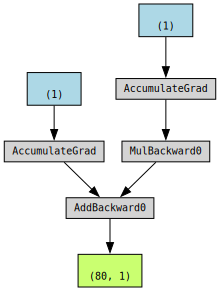

In [41]:
torch.manual_seed(42)
b=torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
w=torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
yhat = b+w *x_train_tensor
error=(yhat-y_train_tensor)
loss = (error**2).mean()
make_dot(yhat)